In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
file_path = 'positions/2p5_HA_Mar6/2p5_HA_6Mar_d_2p5_HA_3 Image 4.csv'

In [30]:
df = pd.read_csv(file_path, skiprows=1)
df['Time']=df['Time']*0.05
df


,Position X,Position Y,Unit,Category,Collection,Time,TrackID,ID
0,143.041000,4.630670,µm,Spot,Position,0.05,1000000889,889
1,88.130302,42.441299,µm,Spot,Position,0.05,1000007845,7845
2,13.971800,50.432098,µm,Spot,Position,0.05,1000009220,9220
3,9.635320,57.437401,µm,Spot,Position,0.05,1000010517,10517
4,95.695602,60.869099,µm,Spot,Position,0.05,1000011177,11177
...,...,...,...,...,...,...,...,...
5270,20.207001,61.486801,µm,Spot,Position,15.00,1005322128,6719553
5271,81.346397,79.318497,µm,Spot,Position,15.00,1003581784,6722789
5272,47.863602,84.172302,µm,Spot,Position,15.00,1005924122,6723736
5273,167.225006,120.051003,µm,Spot,Position,15.00,1005792906,6730218


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


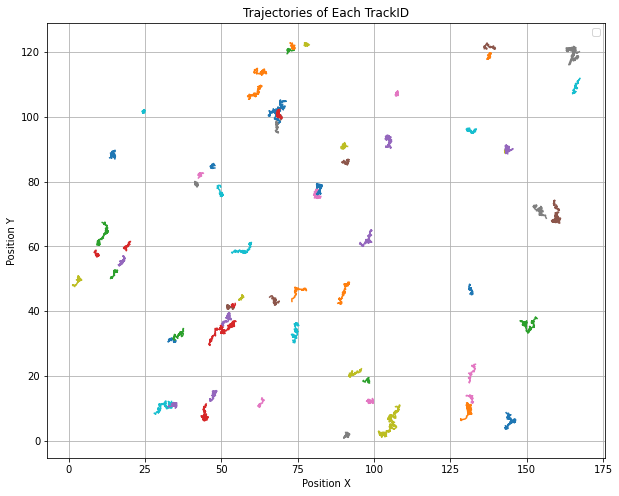

In [31]:
# Sort the dataframe by TrackID and Time
df = df.sort_values(by=['TrackID', 'Time'])

# Plotting the trajectories
plt.figure(figsize=(10, 8))
for track_id, track_data in df.groupby('TrackID'):
    plt.plot(track_data['Position X'], track_data['Position Y'])

plt.title('Trajectories of Each TrackID')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.legend()
plt.grid(True)
plt.show()

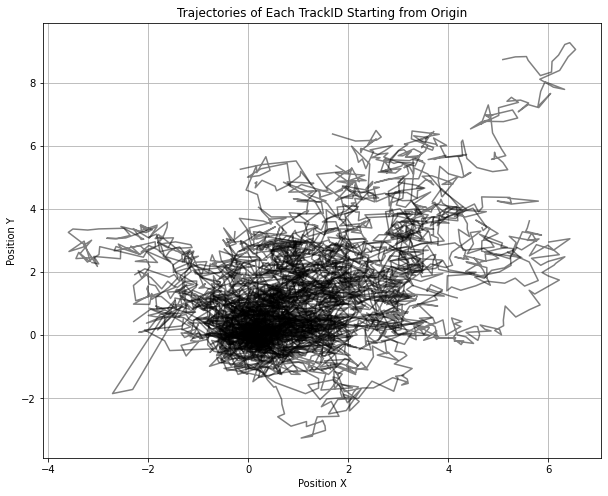

In [32]:
# Sort the dataframe by TrackID and Time
df = df.sort_values(by=['TrackID', 'Time'])

# Function to translate trajectory to origin
def translate_to_origin(track_data):
    initial_x = track_data['Position X'].iloc[0]
    initial_y = track_data['Position Y'].iloc[0]
    track_data['Position X'] -= initial_x
    track_data['Position Y'] -= initial_y
    return track_data

# Plotting the trajectories without markers
plt.figure(figsize=(10, 8))
for track_id, track_data in df.groupby('TrackID'):
    track_data = translate_to_origin(track_data)
    plt.plot(track_data['Position X'], track_data['Position Y'], alpha = 0.5, color='black')
plt.title('Trajectories of Each TrackID Starting from Origin')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.grid(True)
plt.show()